In [85]:
import geopandas as gp
import pandas as pd
import plotly.express as px
from shapely.ops import unary_union
import shapely
import math

Source of data: https://astat.provincia.bz.it/downloads/JB2020(5).pdf

In [86]:
districts = gp.read_file('../data/geo_district_df.shp')

<AxesSubplot:>

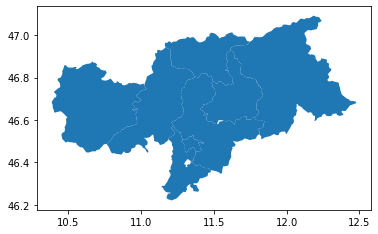

In [87]:
districts.plot()

In [88]:
districts

,district_c,area,population,numaccomm,beds,district_g,district_i,geometry
0,1,5.203870e+07,107760,218.0,3976.0,Bozen,Bolzano,"POLYGON ((11.35870 46.52750, 11.36423 46.52725..."
1,2,1.087709e+09,104858,2024.0,44192.0,Burggrafenamt,Burgraviato,"POLYGON ((11.02312 46.51362, 11.02358 46.51336..."
2,3,6.215404e+08,54026,943.0,20760.0,Eisacktal,Valle Isarco,"POLYGON ((11.52974 46.59407, 11.52973 46.59403..."
3,4,2.068896e+09,80850,3214.0,70318.0,Pustertal,Val Pusteria,"POLYGON ((11.90796 46.53177, 11.90090 46.52942..."
4,5,1.039881e+09,50455,2146.0,40229.0,Salten-Schlern,Salto-Schiliar,"POLYGON ((11.56456 46.38146, 11.56432 46.38135..."
5,6,4.155262e+08,73354,930.0,18403.0,Uberetsch-Unterland,Oltradige-Bassa Ates.,"POLYGON ((11.31282 46.28001, 11.31394 46.27921..."
6,7,1.439561e+09,35507,719.0,19479.0,Vinschgau,Val Venosta,"POLYGON ((10.59412 46.47020, 10.58326 46.47181..."
7,8,6.505408e+08,23593,316.0,9929.0,Wipptal,Alta Valle Isarco,"POLYGON ((11.59570 46.83382, 11.59745 46.83365..."


### GET NATIONALITY ARRIVALS

In [89]:
nationalities = pd.read_csv('../data/nationality_trends.csv')
nationalities2019 = nationalities[nationalities["Year"] == 2019] 

nationalitiesByDistrict2019 = nationalities2019.groupby(by=["Nationality", "district_c"]).sum().reset_index()

In [90]:
nationalitiesByDistrict2019 = pd.pivot(nationalitiesByDistrict2019, index="district_c", columns=['Nationality'], values='Arrivals')
nationalitiesByDistrict2019 = nationalitiesByDistrict2019.reset_index()
nationalitiesByDistrict2019

Nationality,district_c,Austria,Benelux countries,Germany,Italy,Other countries,Switzerland and Liechtenstein
0,1,27013,7320,93151,133168,70597,12528
1,2,98532,30574,925816,279902,59390,154779
2,3,40527,20535,394491,224579,71550,23167
3,4,77610,64017,665838,1098285,292510,48850
4,5,39170,50229,435427,455565,184768,38314
5,6,51398,14249,321951,110727,35636,33689
6,7,27955,25914,305905,130511,43480,56317
7,8,17075,12502,215141,148457,23875,11328


### GET ACCOMMODATION CATEGORY ARRIVALS

In [91]:
categories = pd.read_csv('../data/category_trends.csv')
categories2019 = categories[categories["Year"] == 2019] 

categories2019 = categories2019.groupby(by=["Category", "district_c"]).sum().reset_index()

categories2019

,Category,district_c,Unnamed: 0,Year,Month,Arrivals,Present
0,1-2 Star Hotel,1,61824,24228,78.0,22813,80799
1,1-2 Star Hotel,2,61919,24228,78.0,93674,378232
2,1-2 Star Hotel,3,62015,24228,78.0,82685,353418
3,1-2 Star Hotel,4,62110,24228,78.0,238730,1051203
4,1-2 Star Hotel,5,62206,24228,78.0,66826,284270
...,...,...,...,...,...,...,...
59,Residence,4,62194,24228,78.0,202348,1155389
60,Residence,5,62290,24228,78.0,96066,534226
61,Residence,6,62383,24228,78.0,15199,108223
62,Residence,7,62479,24228,78.0,61391,348035


In [92]:
categoriesByDistrict2019 = pd.pivot(categories2019, index="district_c", columns=['Category'], values='Arrivals')
categoriesByDistrict2019 = categoriesByDistrict2019.reset_index()
categoriesByDistrict2019

Category,district_c,1-2 Star Hotel,3 Star Hotel,4-5 Star Hotel,Agricaltural Lodging,Campings,Other,Private Lodging,Residence
0,1,22813,105032,147987,3997,11181,12383,40137,247
1,2,93674,503374,521066,85511,102143,31584,87097,124544
2,3,82685,298621,207152,66284,20338,40418,28932,30419
3,4,238730,737436,535810,159922,129233,71693,171938,202348
4,5,66826,407691,406541,68882,26762,17403,113302,96066
5,6,51231,265256,95089,59209,54724,4561,22381,15199
6,7,55079,225662,110292,33320,60308,22652,21378,61391
7,8,55681,168482,150355,16827,8351,7547,7804,13331


### GET ARRIVALS BY SEASON

In [93]:
seasonsByDistrict2019 = nationalities2019.groupby(by=["Season", "district_c"]).sum().reset_index()
seasonsByDistrict2019 = pd.pivot(seasonsByDistrict2019, index="district_c", columns=['Season'], values='Arrivals')
seasonsByDistrict2019 = seasonsByDistrict2019.reset_index()
seasonsByDistrict2019

Season,district_c,Autumn,Spring,Summer,Winter
0,1,89833,75596,108586,69762
1,2,442120,337912,617861,151100
2,3,182440,134237,281880,176292
3,4,347372,334520,830691,734527
4,5,207648,178921,442047,374857
5,6,158504,121763,235622,51761
6,7,128977,117149,241729,102227
7,8,88805,79971,146791,112811


### GET ADDITIONAL DATA

In [94]:
district_info = pd.read_csv('../data/district_info.csv')
district_info = district_info.drop(["inhabitants per km2"], axis=1)
district_info

,district_c,average_stay_days,area,population,min_height,max_height,pop_it,pop_de,pop_la,euro_per_inhabitant
0,7,4.2,1441.68,35317,556,3905,2.63,97.29,0.08,4085
1,2,4.7,1100.73,97745,246,3482,21.15,78.54,0.32,2911
2,6,4.1,423.60,71606,207,2439,32.07,67.48,0.44,2481
3,1,2.1,52.34,102575,232,1616,73.80,25.52,0.68,2110
4,5,4.9,1036.63,48291,243,3179,4.31,76.79,18.91,3607
5,3,4.0,623.78,50210,450,3132,13.20,85.52,1.27,2869
6,8,3.4,650.01,19243,723,3509,14.35,85.29,0.35,3342
7,4,4.6,2071.66,79656,722,3498,5.97,80.48,13.54,3640


### MERGE DATA SOURCES

In [95]:
featureVector = districts[['numaccomm', 'beds', 'district_c']]

# ADD ADDITIONAL INFO  
featureVector = pd.merge(featureVector, district_info, on = "district_c", how = "inner")

# ADD NATIONALITY INFO
featureVector = pd.merge(featureVector, nationalitiesByDistrict2019, on = "district_c", how = "inner")

# ADD CATEGORY INFO
featureVector = pd.merge(featureVector, categoriesByDistrict2019, on = "district_c", how = "inner")

# ADD SEASON INFO
featureVector = pd.merge(featureVector, seasonsByDistrict2019, on = "district_c", how = "inner")

featureVector = featureVector.set_index("district_c")
featureVector

,numaccomm,beds,average_stay_days,area,population,min_height,max_height,pop_it,pop_de,pop_la,...,4-5 Star Hotel,Agricaltural Lodging,Campings,Other,Private Lodging,Residence,Autumn,Spring,Summer,Winter
district_c,,,,,,,,,,,,,,,,,,,,,
1,218.0,3976.0,2.1,52.34,102575,232,1616,73.80,25.52,0.68,...,147987,3997,11181,12383,40137,247,89833,75596,108586,69762
2,2024.0,44192.0,4.7,1100.73,97745,246,3482,21.15,78.54,0.32,...,521066,85511,102143,31584,87097,124544,442120,337912,617861,151100
3,943.0,20760.0,4.0,623.78,50210,450,3132,13.20,85.52,1.27,...,207152,66284,20338,40418,28932,30419,182440,134237,281880,176292
4,3214.0,70318.0,4.6,2071.66,79656,722,3498,5.97,80.48,13.54,...,535810,159922,129233,71693,171938,202348,347372,334520,830691,734527
5,2146.0,40229.0,4.9,1036.63,48291,243,3179,4.31,76.79,18.91,...,406541,68882,26762,17403,113302,96066,207648,178921,442047,374857
6,930.0,18403.0,4.1,423.60,71606,207,2439,32.07,67.48,0.44,...,95089,59209,54724,4561,22381,15199,158504,121763,235622,51761
7,719.0,19479.0,4.2,1441.68,35317,556,3905,2.63,97.29,0.08,...,110292,33320,60308,22652,21378,61391,128977,117149,241729,102227
8,316.0,9929.0,3.4,650.01,19243,723,3509,14.35,85.29,0.35,...,150355,16827,8351,7547,7804,13331,88805,79971,146791,112811


### CALCULATE SIMULARITY

#### Min Max Scaling

In [96]:
features_scaled = featureVector.copy()
  
# apply normalization techniques
for column in features_scaled.columns:
    features_scaled[column] = (features_scaled[column] - features_scaled[column].min()) / (features_scaled[column].max() - features_scaled[column].min())    
  
features_scaled

,numaccomm,beds,average_stay_days,area,population,min_height,max_height,pop_it,pop_de,pop_la,...,4-5 Star Hotel,Agricaltural Lodging,Campings,Other,Private Lodging,Residence,Autumn,Spring,Summer,Winter
district_c,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,1.000000,0.048450,0.000000,1.000000,0.000000,0.031864,...,0.120026,0.000000,0.023411,0.116517,0.196991,0.000000,0.002910,0.000000,0.000000,0.026365
2,0.602804,0.606192,0.928571,0.519180,0.942039,0.075581,0.815203,0.260222,0.738749,0.012746,...,0.966546,0.522777,0.775897,0.402535,0.483099,0.615024,1.000000,1.000000,0.705264,0.145495
3,0.241989,0.252992,0.678571,0.282986,0.371610,0.470930,0.662298,0.148518,0.836004,0.063197,...,0.254272,0.399468,0.099163,0.534127,0.128724,0.149292,0.265018,0.223551,0.239984,0.182392
4,1.000000,1.000000,0.892857,1.000000,0.724968,0.998062,0.822193,0.046930,0.765780,0.714817,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.731831,0.987069,1.000000,1.000000
5,0.643525,0.546456,1.000000,0.487436,0.348582,0.069767,0.682831,0.023605,0.714365,1.000000,...,0.706687,0.416130,0.152306,0.191295,0.642755,0.474114,0.336366,0.393895,0.461790,0.473216
6,0.237650,0.217464,0.714286,0.183854,0.628366,0.000000,0.359546,0.413657,0.584645,0.019118,...,0.000000,0.354093,0.383622,0.000000,0.088812,0.073983,0.197272,0.175998,0.175925,0.000000
7,0.167223,0.233683,0.750000,0.688024,0.192891,0.676357,1.000000,0.000000,1.000000,0.000000,...,0.034496,0.188058,0.429816,0.269484,0.082701,0.302542,0.113700,0.158408,0.184382,0.073914
8,0.032710,0.089732,0.464286,0.295976,0.000000,1.000000,0.826999,0.164676,0.832799,0.014339,...,0.125399,0.082283,0.000000,0.044480,0.000000,0.064740,0.000000,0.016678,0.052908,0.089416


#### Similarity

In [97]:
from sklearn.metrics.pairwise import cosine_similarity

names = ['Bozen', 'Burggrafenamt', 'Eisacktal', 'Pustertal', 'Salten-Schlern', 'Uberetsch-Unterland', 'Vinschgau', 'Wipptal']

similarities = pd.DataFrame(cosine_similarity(features_scaled), columns=range(1, 9),
                  index=range(1, 9))

similarities_named = pd.DataFrame(cosine_similarity(features_scaled), columns=names,
                  index=names)

In [98]:
similarities_named

,Bozen,Burggrafenamt,Eisacktal,Pustertal,Salten-Schlern,Uberetsch-Unterland,Vinschgau,Wipptal
Bozen,1.000000,0.313622,0.268370,0.230376,0.191954,0.492863,0.094884,0.090922
Burggrafenamt,0.313622,1.000000,0.812024,0.837530,0.784293,0.829108,0.679950,0.450493
Eisacktal,0.268370,0.812024,1.000000,0.836409,0.812596,0.824922,0.876415,0.792500
Pustertal,0.230376,0.837530,0.836409,1.000000,0.889820,0.676141,0.698338,0.532867
Salten-Schlern,0.191954,0.784293,0.812596,0.889820,1.000000,0.697456,0.721487,0.553111
Uberetsch-Unterland,0.492863,0.829108,0.824922,0.676141,0.697456,1.000000,0.717645,0.540560
Vinschgau,0.094884,0.679950,0.876415,0.698338,0.721487,0.717645,1.000000,0.890124
Wipptal,0.090922,0.450493,0.792500,0.532867,0.553111,0.540560,0.890124,1.000000


In [100]:
similarities_named.to_csv('../data/similarities.csv', index=True)
similarities.to_csv('../data/similarities_indexed.csv', index=True)